# Comparing alignment-free and usual MSA-based phylogenetic metrics

## Constructing our dataset of alpha, beta, delta and gammacoronaviruses

### Downloading genomic sequences from NCBI via custon E-utilities custom link
Sequences obtained following https://doi.org/10.1371/journal.pone.0264640.
Use it in a simple web-browser.

https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nucleotide&id=NC_022103.1,NC_048216.1,NC_046964.1,NC_032107.1,NC_028833.1,NC_028824.1,NC_028814.1,NC_028811.1,NC_032730.1,NC_018871.1,NC_025217.1,NC_030886.1,MN996532,NC_034440.1,NC_014470.1,NC_010438.1,NC_010437.1,NC_009988.1,NC_009021.1,NC_009020.1,NC_009019.1,NC_009657.1,NC_005831.2,NC_002645.1,NC_045512.2,NC_006213.1,NC_038294.1,NC_019843.3,NC_006577.2,NC_004718.3,NC_034972.1,NC_028752.1,MT121216.1,MT040336.1,NC_039207.1,NC_026011.1,NC_017083.1,NC_012936.1,NC_003045.1,KX432213.1,JX860640.1,NC_010646.1,NC_038861.1,NC_030292.1,NC_028806.1,NC_023760.1,NC_002306.3,NC_003436.1,NC_039208.1,NC_010800.1,NC_048214.1,NC_048213.1,NC_046965.1,NC_001451.1,NC_011547.1,NC_016992.1,NC_016991.1,NC_016996.1,NC_016995.1,NC_016994.1,NC_016993.1,NC_011550.1,NC_011549.1,NC_001846.1,NC_048217.1,AC_000192.1&rettype=fasta


Then, place the file sequences in the notebook's folder in order to facilitate finding this file.
(We named this file as cov4gen.fasta)
__________________________________________________________________________________________________________

Verifying its content:

In [1]:
!grep -c ">" cov4gen.fasta

66


In [2]:
!grep ">" cov4gen.fasta

>NC_022103.1 Bat coronavirus CDPHE15/USA/2006, complete genome
>NC_048216.1 NL63-related bat coronavirus strain BtKYNL63-9b, complete genome
>NC_046964.1 Alphacoronavirus Bat-CoV/P.kuhlii/Italy/3398-19/2015, complete genome
>NC_032107.1 NL63-related bat coronavirus strain BtKYNL63-9a, complete genome
>NC_028833.1 BtNv-AlphaCoV/SC2013, complete genome
>NC_028824.1 BtRf-AlphaCoV/YN2012, complete genome
>NC_028814.1 BtRf-AlphaCoV/HuB2013, complete genome
>NC_028811.1 BtMr-AlphaCoV/SAX2011, complete genome
>NC_032730.1 Lucheng Rn rat coronavirus isolate Lucheng-19, complete genome
>NC_018871.1 Rousettus bat coronavirus HKU10, complete genome
>NC_025217.1 Bat Hp-betacoronavirus/Zhejiang2013, complete genome
>NC_030886.1 Rousettus bat coronavirus isolate GCCDC1 356, complete genome
>MN996532.2 Bat coronavirus RaTG13, complete genome
>NC_034440.1 Bat coronavirus isolate PREDICT/PDF-2180, complete genome
>NC_014470.1 Bat coronavirus BM48-31/BGR/2008, complete genome
>NC_010438.1 Miniopterus ba

We add these three sequences from GISAID, as described in the method from the above paper:
* Beijing.IVDC_01
* Beijing.IVDC_02
* Beijing.IVDC_03

In [3]:
!cat cov4gen.fasta 1673264835172.sequences.fasta > db_cov.fasta

In [4]:
!grep -c ">" db_cov.fasta

69


### Multiple Sequence Analysis
Alignment of the 69 sequences using mafft linsi method. 
(We do not recommend to run this in a common user PC because of its wide RAM usage).
This command above consumed high ammounts of RAM!!! (+to 60 GB)

In [ ]:
!nohup linsi --thread 32 --leavegappyregion db_cov.fasta > alig_cov.fasta &

Before running IQTREE, we trimmed the alignment with trimAl v1.4.rev22. We choose to remove all positions in the alignment with gaps in 10% or more of the sequences, unless this leaves less than 70% of original alignment.

In [ ]:
!trimal -in alig_cov.fasta -out trimm_alig_cov.fasta -gt 0.9 -cons 70

### Estimating Maximum-Likelihood Phylogeny
The maximum-likelihood phylogenetic trees were obtained using IQTREE v2.2.0 software with the Ultrafast Bootstrap parameter set at 1000 and 1000 replicates of the SH-aLRT test. We used the GTR+I+G substitution model, as there is evidence that this model choice leads to phylogenetic analyses comparable to those made using current strategies for evolutionary model selection.

In [ ]:
%%bash
IQTREE2=/dados/software/iqtree-2.2.0-Linux/bin/iqtree2
$IQTREE2 -T AUTO -s trimm_alig_cov.fasta -m GTR+I+G -B 1000 -alrt 1000

## Plotting Trees with GGtree with metadata annotation

In [5]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Load the installed packages

png 
  2 


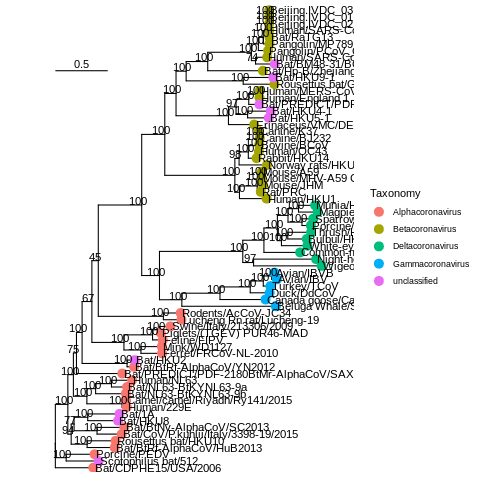

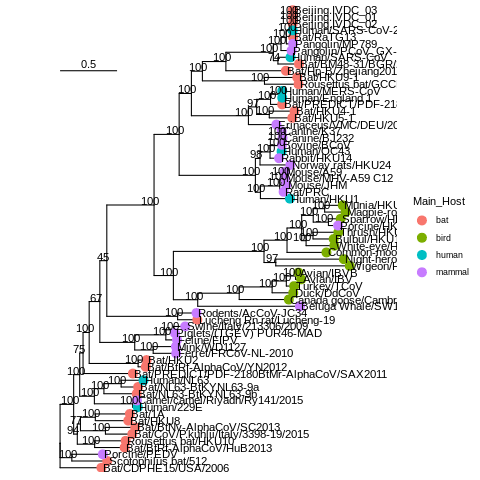

In [9]:
%%R
library(tidyverse)  
library(ape) 
library(ggtree) 
library(tidytree)
library(treeio)

meta = read.csv("meta_cov.csv", sep=",", stringsAsFactors = F)
names(meta)[2] = "label"
head(meta)

tree = read.iqtree("trimm_alig_cov.fasta.contree") 

p = ggtree(tree, ladderize = T)
p$data = left_join(p$data, meta, by="label") 
p1 = p + geom_tippoint(aes(color = Taxonomy), size = 4) +
  geom_tiplab(aes(label = Name), size = 4) +
  geom_treescale(x=0, y=60, width=0.5, color='black') + 
  geom_text2(aes(label=label, subset = !is.na(as.numeric(label))), size = 4 , nudge_x = -0.035, nudge_y = 0.6) +
  theme(legend.position="right") + xlim(-0.3,2.7) 


p2 = p + geom_tippoint(aes(color = Main_Host), size = 4) +
  geom_tiplab(aes(label = Name), size = 4) +
  geom_treescale(x=0, y=60, width=0.5, color='black') + 
  geom_text2(aes(label=label, subset = !is.na(as.numeric(label)) ), size = 4, nudge_x = -0.035, nudge_y = 0.6) +
  theme(legend.position="right") + xlim(-0.3,2.8) 


#better seen in x11 device
plot(p1)
plot(p2)


svg("FIG_taxono.svg", width = 20, height = 10)
plot(p1)
dev.off()

svg("FIG_host.svg", width = 20, height = 10)
plot(p2)
dev.off()

### Obtaining tree statistics and topological properties with phyloTOP R package

In [13]:
%%R
library(phyloTop)
library(treeio)
library(castor)


tree = read.iqtree("trimm_alig_cov.fasta.contree") 

a = phyloTop(c(as.phylo(tree)))
b = phyloTop(c(as.phylo(tree)), normalise = T)

print("Raw metric")
print(a)
print("Normalized")
print(b)

[1] "Raw metric"
  avgLadder cherries colless.phylo ILnumber maxHeight pitchforks sackin.phylo
1         4       22           542       25        20          8          810
    stairs1   stairs2
1 0.6470588 0.5746997
[1] "Normalized"
   avgLadder  cherries colless.phylo  ILnumber maxHeight pitchforks
1 0.05970149 0.6376812      0.237928 0.3731343 0.2941176  0.3478261
  sackin.phylo   stairs1   stairs2
1    0.3355427 0.6470588 0.5746997


# Generating numerical representation to perforn alignment-free analysis

Using the ad-hoc script called numeric_encoding.py (see README.md).

In [14]:
! python3 numeric_encoding.py --fasta db_cov.fasta --repr triplet --thread 12 #triplet

File choosed:
db_cov.fasta
Numeric Encoding:
triplet
Number of threads to use
12


In [15]:
! python3 numeric_encoding.py --fasta db_cov.fasta --repr Magnus --thread 12 #Magnus

File choosed:
db_cov.fasta
Numeric Encoding:
Magnus
Number of threads to use
12


In [17]:
! python3 numeric_encoding.py --fasta db_cov.fasta --repr Fast --thread 12 #Fast

File choosed:
db_cov.fasta
Numeric Encoding:
Fast
Number of threads to use
12


In [37]:
! python3 numeric_encoding.py --fasta db_cov.fasta --repr 4-mer --thread 12 #natural 4-mer

File choosed:
db_cov.fasta
Numeric Encoding:
4-mer
Number of threads to use
12


In [25]:
! python3 numeric_encoding.py --fasta db_cov.fasta --repr c-4-mer --thread 12 #natural 4-mer

File choosed:
db_cov.fasta
Numeric Encoding:
c-4-mer
Number of threads to use
12


In [22]:
! python3 numeric_encoding.py --fasta db_cov.fasta --repr 6-mer --thread 12 #natural 6-mer

File choosed:
db_cov.fasta
Numeric Encoding:
6-mer
Number of threads to use
12


In [23]:
! python3 numeric_encoding.py --fasta db_cov.fasta --repr c-6-mer --thread 12 #natural 6-mer

File choosed:
db_cov.fasta
Numeric Encoding:
c-6-mer
Number of threads to use
12


## Generating a 2D version from each representation

In [38]:
from sklearn.decomposition import PCA, SparsePCA, IncrementalPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import MDS
from umap.umap_ import UMAP
import pandas as pd

def scaler(data):
    mms = MinMaxScaler()
    return mms.fit_transform(data.to_numpy())

MY_SEED = 42

#### Reading and parsing (scale) data

In [39]:
triplet = pd.read_csv("db_cov.fasta.triplet.csv", index_col= 0)
triplet = scaler(triplet.set_index("id"))

In [40]:
fast = pd.read_csv("db_cov.fasta.fast.csv", index_col= 0, header = None)
fast = scaler(fast.set_index(1))

In [41]:
magnus = pd.read_csv("db_cov.fasta.magnus.csv", index_col= 0, header = None)
magnus = magnus.loc[["NC_022103.1","NC_048216.1","NC_046964.1","NC_032107.1","NC_028833.1","NC_028824.1","NC_028814.1","NC_028811.1","NC_032730.1","NC_018871.1","NC_025217.1","NC_030886.1","MN996532.2","NC_034440.1","NC_014470.1","NC_010438.1","NC_010437.1","NC_009988.1","NC_009021.1","NC_009020.1","NC_009019.1","NC_009657.1","NC_005831.2","NC_002645.1","NC_045512.2","NC_006213.1","NC_038294.1","NC_019843.3","NC_006577.2","NC_004718.3","NC_034972.1","NC_028752.1","MT121216.1","MT040336.1","NC_039207.1","NC_026011.1","NC_017083.1","NC_012936.1","NC_003045.1","KX432213.1","JX860640.1","NC_010646.1","NC_038861.1","NC_030292.1","NC_028806.1","NC_023760.1","NC_002306.3","NC_003436.1","NC_039208.1","NC_010800.1","NC_048214.1","NC_048213.1","NC_046965.1","NC_001451.1","NC_011547.1","NC_016992.1","NC_016991.1","NC_016996.1","NC_016995.1","NC_016994.1","NC_016993.1","NC_011550.1","NC_011549.1","NC_001846.1","NC_048217.1","AC_000192.1","hCoV-19/Beijing/IVDC-01-06/2020","hCoV-19/Beijing/IVDC-02-06/2020","hCoV-19/env/Beijing/IVDC-03-06/2020"]]
#["NC_022103.1","NC_048216.1","NC_046964.1","NC_032107.1","NC_028833.1","NC_028824.1","NC_028814.1","NC_028811.1","NC_032730.1","NC_018871.1","NC_025217.1","NC_030886.1","MN996532.2","NC_034440.1","NC_014470.1","NC_010438.1","NC_010437.1","NC_009988.1","NC_009021.1","NC_009020.1","NC_009019.1","NC_009657.1","NC_005831.2","NC_002645.1","NC_045512.2","NC_006213.1","NC_038294.1","NC_019843.3","NC_006577.2","NC_004718.3","NC_034972.1","NC_028752.1","MT121216.1","MT040336.1","NC_039207.1","NC_026011.1","NC_017083.1","NC_012936.1","NC_003045.1","KX432213.1","JX860640.1","NC_010646.1","NC_038861.1","NC_030292.1","NC_028806.1","NC_023760.1","NC_002306.3","NC_003436.1","NC_039208.1","NC_010800.1","NC_048214.1","NC_048213.1","NC_046965.1","NC_001451.1","NC_011547.1","NC_016992.1","NC_016991.1","NC_016996.1","NC_016995.1","NC_016994.1","NC_016993.1","NC_011550.1","NC_011549.1","NC_001846.1","NC_048217.1","AC_000192.1","hCoV-19/Beijing/IVDC-01-06/2020","hCoV-19/Beijing/IVDC-02-06/2020","hCoV-19/env/Beijing/IVDC-03-06/2020"])
magnus = scaler(magnus) #this one  must be scaled

In [44]:
nat4mer = pd.read_csv("db_cov.fasta.4natvec.csv", index_col= 0)
nat4mer = nat4mer.set_index("id")
nat4mer = scaler(nat4mer) #this one  must be scaled

In [48]:
cnat4mer = pd.read_csv("db_cov.fasta.c4natvec.csv", index_col= 0)
cnat4mer = cnat4mer.set_index("id")
cnat4mer = scaler(cnat4mer) #this one  must be scaled

In [49]:
nat6mer = pd.read_csv("db_cov.fasta.6natvec.csv", index_col= 0)
nat6mer = nat6mer.set_index("id")
nat6mer = scaler(nat6mer) #this one  must be scaled

In [50]:
cnat6mer = pd.read_csv("db_cov.fasta.c6natvec.csv", index_col= 0)
cnat6mer = cnat6mer.set_index("id")
cnat6mer = scaler(cnat6mer) #this one  must be scaled